In [23]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem import WordNetLemmatizer  
from nltk.stem import PorterStemmer 
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("Dataset/Reddit_Data.csv")
print(df.head())
print(f"Shape of the Dataset: {df.shape}")

                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1
Shape of the Dataset: (37249, 2)


In [4]:
print(df.keys())
print(df['category'].value_counts())



Index(['clean_comment', 'category'], dtype='object')
category
 1    15830
 0    13142
-1     8277
Name: count, dtype: int64


In [5]:
df['clean_comment'].astype(str)# Checking for null values in the DataFrame
print(df.isnull().sum())
df.dropna(subset=['clean_comment'], inplace=True)  # Dropping rows with null values in 'clean_comment'
print("After dropping null values:")
print(df.isnull().sum())

clean_comment    100
category           0
dtype: int64
After dropping null values:
clean_comment    0
category         0
dtype: int64


In [6]:
stop_words = set(nltk.corpus.stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = ''.join(char for char in text if char.isalnum() or char.isspace())
    # Remove extra spaces
    text = ' '.join(text.split())
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    # Remove numbers
    text = ''.join(char for char in text if not char.isdigit())
    # Remove URLs
    text = ' '.join(word for word in text.split() if not word.startswith('http'))
    # Remove mentions   
    text = ' '.join(word for word in text.split() if not word.startswith('@'))
    # Applying Stemming
    text = ' '.join(stemmer.stem(word) for word in text.split())
    # Applying Lemmatization
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())

    return text

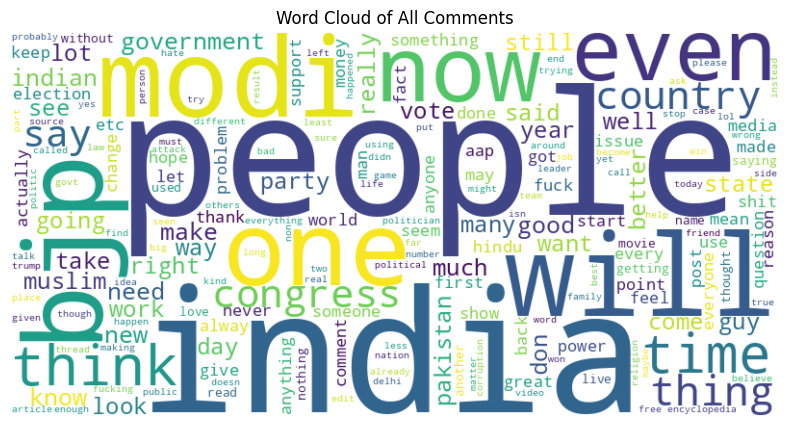

In [7]:
df['preprocessed_text'] = df['clean_comment'].apply(lambda x: preprocess_text(str(x)))
df.head()
# Visualizing the of wordcloud
def plot_wordcloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    if title:
        plt.title(title)
    plt.show()
# Concatenate all comments into a single string for word cloud generation
all_comments = ' '.join(df['clean_comment'].astype(str))    
# Plotting the word cloud for all comments
plot_wordcloud(all_comments, title='Word Cloud of All Comments')


C:\Users\ravia\AppData\Local\Temp\ipykernel_23224\1260408955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette='viridis')


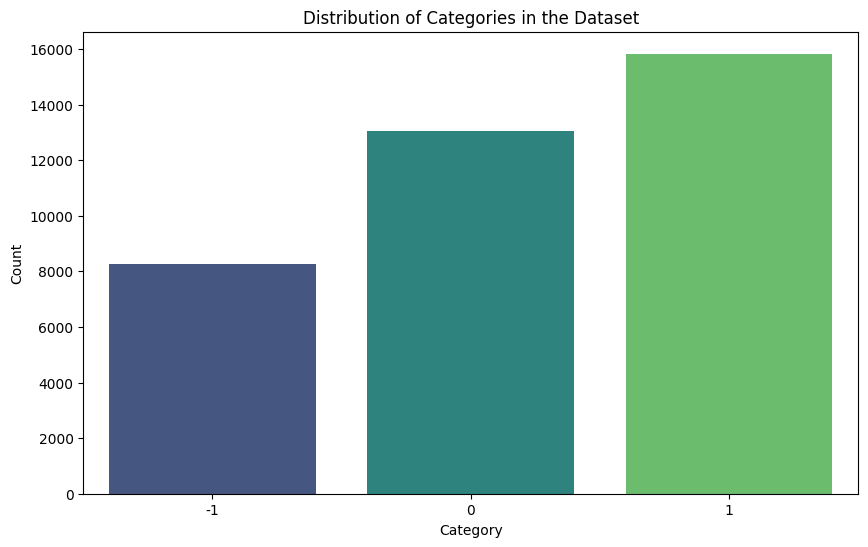

In [10]:
# Plotting Number of Classes in the Dataset
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df, palette='viridis')
plt.title('Distribution of Categories in the Dataset')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks()
plt.show()

In [11]:
# Getting Number of Unique words in the Sentences
df['num_unique_words'] = df['preprocessed_text'].apply(lambda x: len(set(x.split())))
print("Number of unique words in each sentence:")
print(df['num_unique_words'].head())
# Getting the Length of the Sentences
df['sentence_length'] = df['preprocessed_text'].apply(lambda x: len(x.split()))
print("Length of each sentence:")
print(df['sentence_length'].head())

Number of unique words in each sentence:
0     25
1    102
2     44
3     14
4     60
Name: num_unique_words, dtype: int64
Length of each sentence:
0     26
1    137
2     46
3     14
4     67
Name: sentence_length, dtype: int64


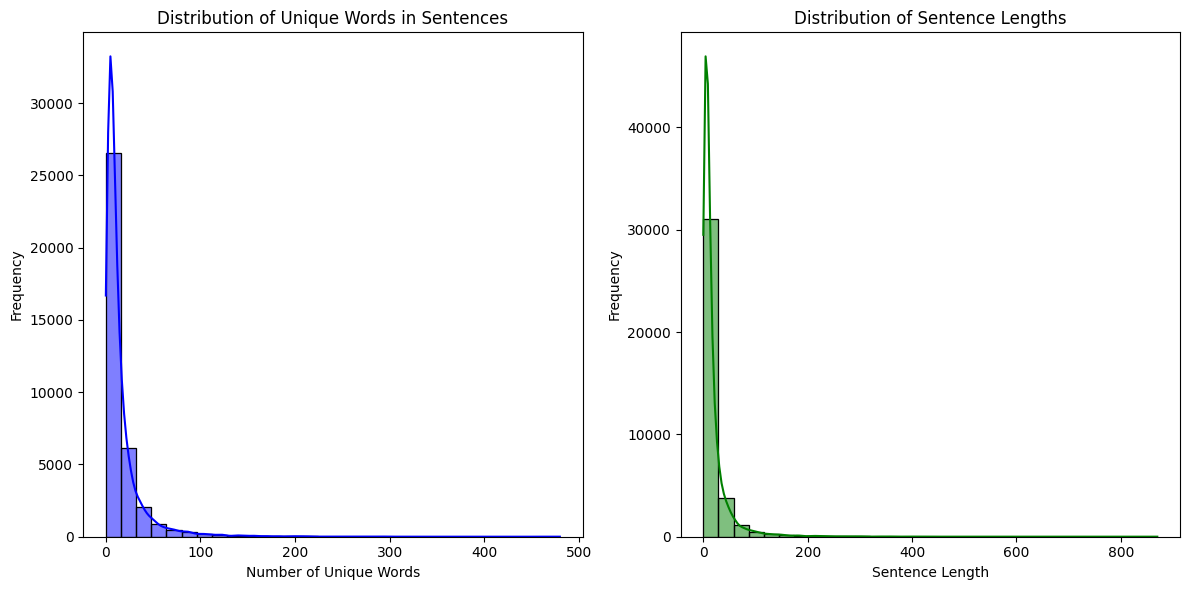

In [12]:
# Plotting the Distribution of Unique Words and Sentence Length
plt.figure(figsize=(12, 6)) 
plt.subplot(1, 2, 1)
sns.histplot(df['num_unique_words'], bins=30, kde=True, color='blue')
plt.title('Distribution of Unique Words in Sentences')      
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.histplot(df['sentence_length'], bins=30, kde=True, color='green')
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

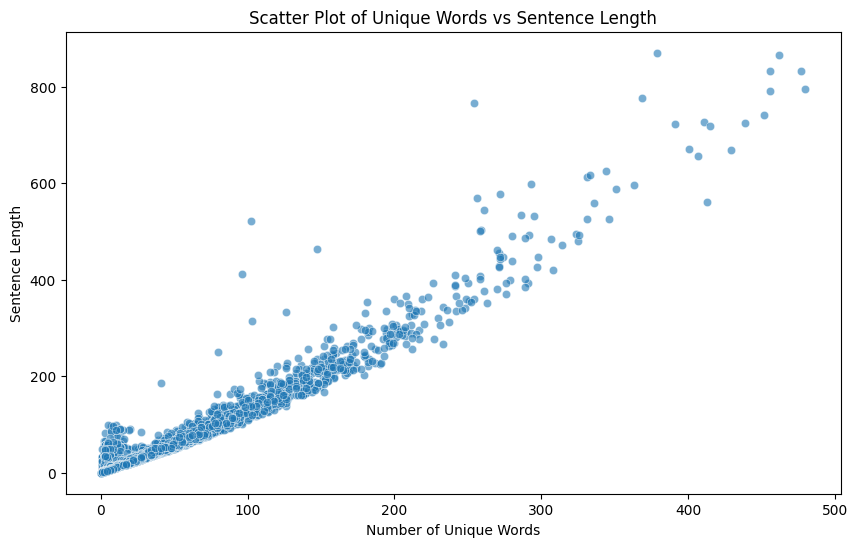

In [14]:
#Plotting Scatter plot of Unique Words vs Sentence Length
plt.figure(figsize=(10, 6)) 
sns.scatterplot(x='num_unique_words', y='sentence_length', data=df, alpha=0.6)
plt.title('Scatter Plot of Unique Words vs Sentence Length')        
plt.xlabel('Number of Unique Words')
plt.ylabel('Sentence Length')
plt.show()


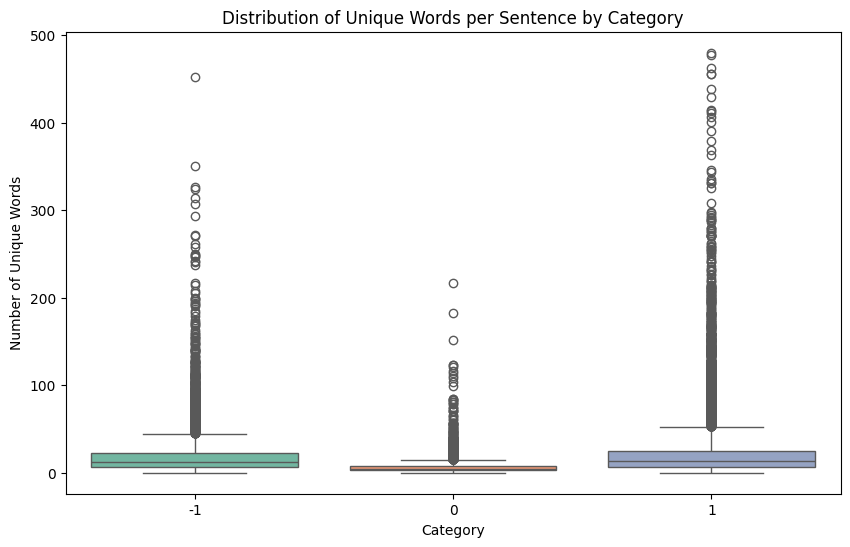

In [24]:
# Plotting the distribution of unique words with respect to each class
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='num_unique_words', data=df, palette='Set2')
plt.title('Distribution of Unique Words per Sentence by Category')
plt.xlabel('Category')
plt.ylabel('Number of Unique Words')
plt.show()

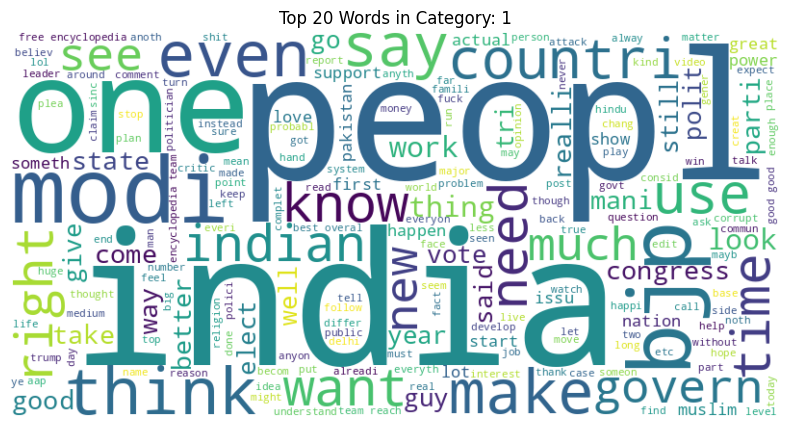

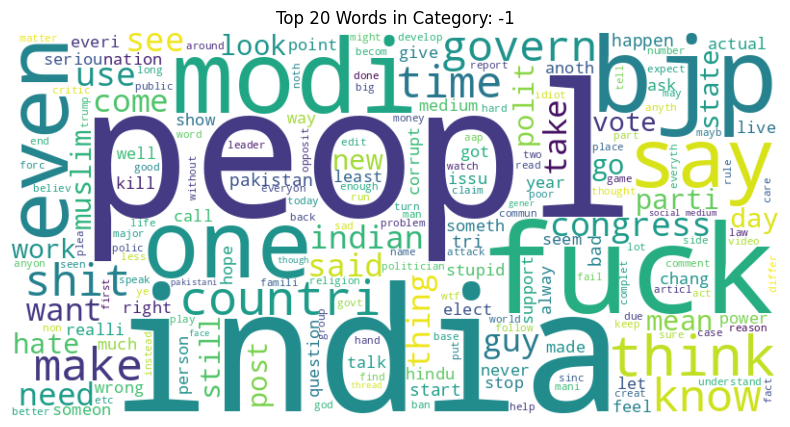

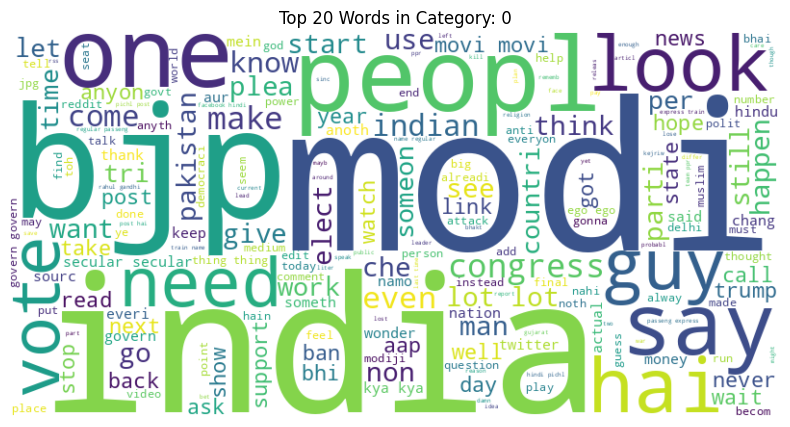

In [25]:
#Ploting Words Which has the highest frequency in each class
def plot_top_words_by_category(df, category, top_n=20):
    category_df = df[df['category'] == category]
    all_words = ' '.join(category_df['preprocessed_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Top {top_n} Words in Category: {category}')
    plt.show()
for category in df['category'].unique():
    plot_top_words_by_category(df, category, top_n=20)

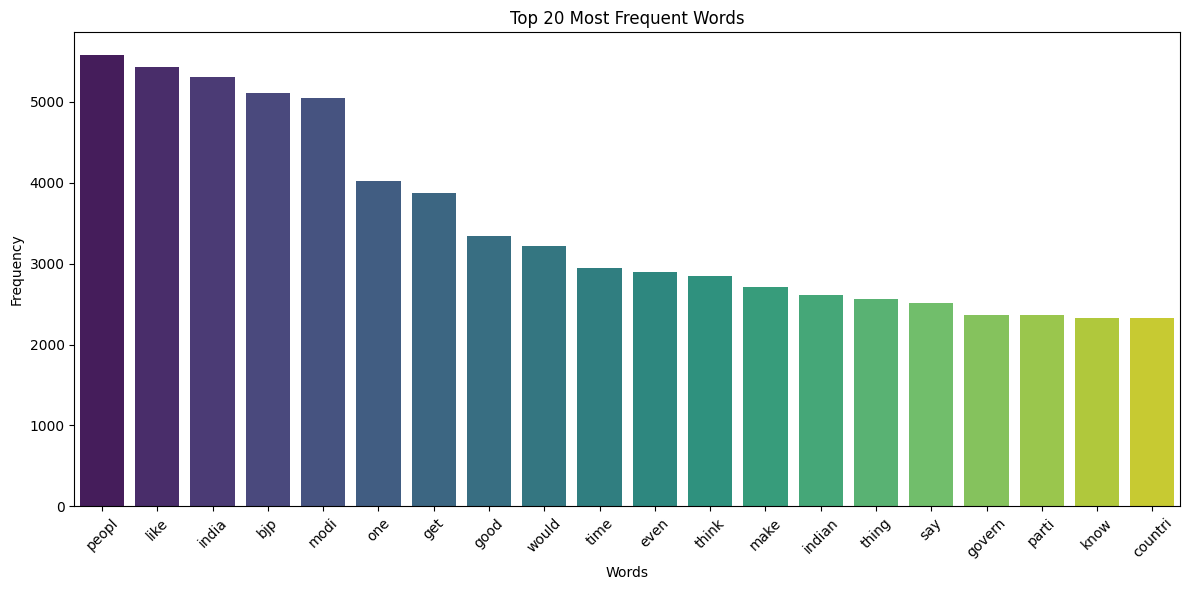

In [26]:

def plot_top_n_words(df, column, n=20):
    # Combine all text in the specified column
    all_text = ' '.join(df[column].astype(str))
    # Split into words and count frequencies
    word_counts = Counter(all_text.split())
    # Get the n most common words
    top_words = word_counts.most_common(n)
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(words), y=list(counts), palette='viridis')
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_n_words(df, 'preprocessed_text', n=20)

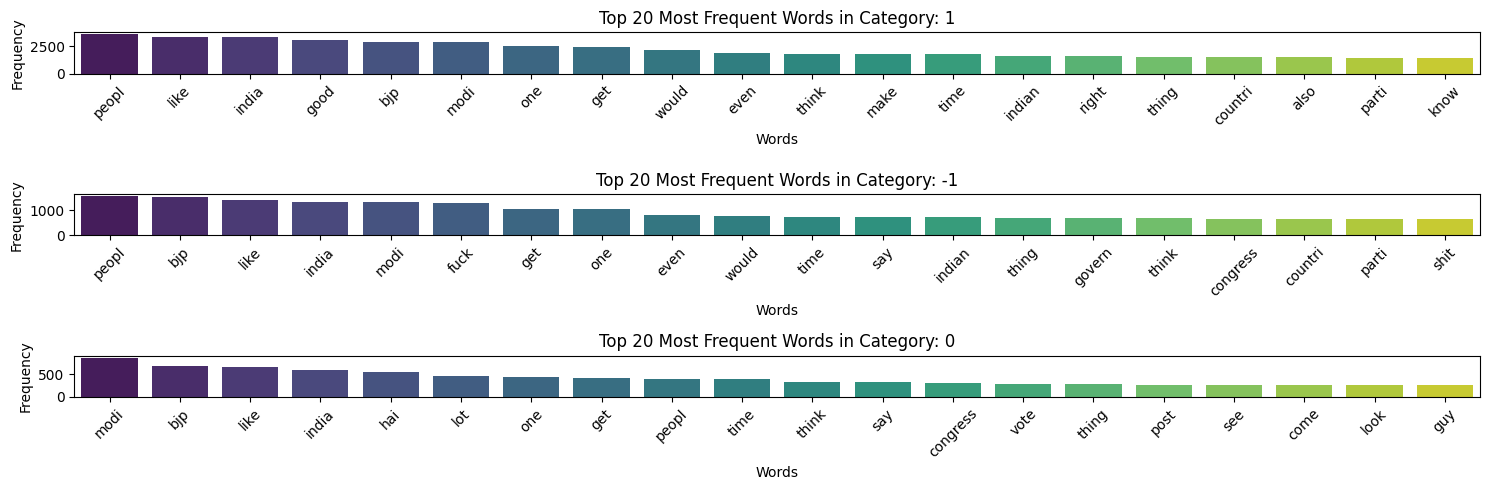

In [27]:

def plot_top_n_words_each_class(df, column, n=20):
    categories = df['category'].unique()
    fig , ax  = plt.subplots(len(categories), 1, figsize=(15, 5))
    for i, category in enumerate(categories):
        category_df = df[df['category'] == category]
        # Combine all text in the specified column
        all_text = ' '.join(category_df[column].astype(str))
        # Split into words and count frequencies
        word_counts = Counter(all_text.split())
        # Get the n most common words
        top_words = word_counts.most_common(n)
        words, counts = zip(*top_words)
        
        sns.barplot(x=list(words), y=list(counts), palette='viridis', ax=ax[i])
        ax[i].set_title(f'Top {n} Most Frequent Words in Category: {category}')
        ax[i].set_xlabel('Words')
        ax[i].set_ylabel('Frequency')
        ax[i].tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()

plot_top_n_words_each_class(df, 'preprocessed_text', n=20)